In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

observations = pd.read_csv("data/observations.csv")



In [2]:
species = pd.read_csv("data/species_info.csv")

#fill the missing conservation status with "No danger"
species["conservation_status"]= species["conservation_status"].fillna("No danger")


In [3]:
#combine the tables, so all of the species info is in one space
obs_and_spec = pd.merge(observations, species)
#makes a list of everything needing attention = concern, endangered, threatened, recovery
in_danger = obs_and_spec[obs_and_spec["conservation_status"] != "No danger"]
park_groups = obs_and_spec.groupby("park_name").observations.sum()


In [4]:

#The amount of observations of species for each conservation status
in_danger_sum = in_danger.groupby("conservation_status")["observations"].sum()
#The number of types of species for each conservation status
in_danger_count = in_danger.groupby("conservation_status")["observations"].count()



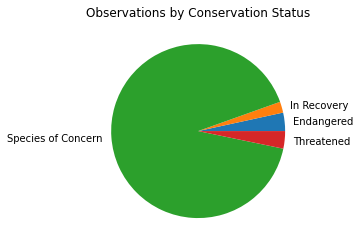

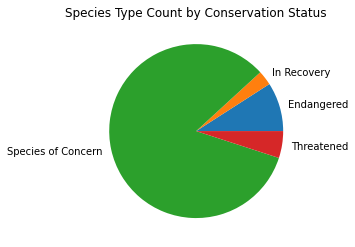

<Figure size 432x288 with 0 Axes>

In [5]:


graph_labels = ["Endangered", "In Recovery", "Species of Concern", "Threatened"]
#Total observations per category
plt.pie(in_danger_sum, labels = graph_labels)
plt.title("Observations by Conservation Status")
plt.show()
plt.clf()
#How many types of species per category
plt.pie(in_danger_count, labels = graph_labels)
plt.title("Species Type Count by Conservation Status")
plt.show()
plt.clf()


The first pie chart counts all the observations and groups them into each danger level. The species in the mildest level of concern have the most observations because they are more prolific than other types.The second pie chart counts all the types of species observed and groups them, but not the number of each type observed. The endangered and threatened species take up a higher portion of the type count. This means that there are multiple types of endangered species but very few observations of them. If a conservationist looked at the charts, they should pay attention to the “endangered” and “threatened” parts of the observations chart with a goal of the park having more counts of those species. 


In [7]:
print("These are the park names and observations for each\n")
#data frame for each park
bryce_frame  = in_danger[in_danger["park_name"] == "Bryce National Park"]
smoky_frame = in_danger[in_danger["park_name"] == "Great Smoky Mountains National Park"]
yellowstone_frame = in_danger[in_danger["park_name"] == "Yellowstone National Park"]
yosemite_frame = in_danger[in_danger["park_name"] == "Yosemite National Park"]

#Grouping each national park by observations per conservation status
bryce_by_level = bryce_frame.groupby("conservation_status")["observations"].sum().reset_index()
smoky_by_level = smoky_frame.groupby("conservation_status")["observations"].sum().reset_index()
yellowstone_by_level = yellowstone_frame.groupby("conservation_status")["observations"].sum().reset_index()
yosemite_by_level = yosemite_frame.groupby("conservation_status")["observations"].sum().reset_index()

print(park_groups)



These are the park names and observations for each

park_name
Bryce National Park                     633291
Great Smoky Mountains National Park     474863
Yellowstone National Park              1587641
Yosemite National Park                  949452
Name: observations, dtype: int64


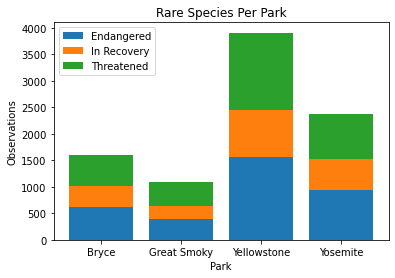

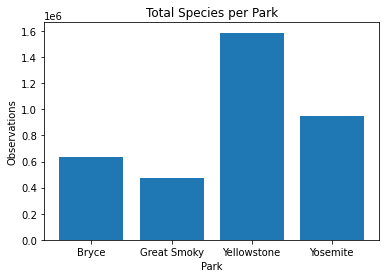

In [6]:
#x axis - The park names for serious animals
#y axis - the total amount concerning observations, each stacked bar represents the status
endanger = [619, 393, 1558, 943]
in_recovery  = [388, 248, 889, 582]
threatened  = [591, 440, 1459, 849]
total = [633291, 474863, 1587641, 949452]
threat_bottom = np.add(endanger, in_recovery)
plt.bar(range(4),endanger)

plt.bar(range(4),
  in_recovery,
  bottom=endanger)

plt.bar(range(4),
  threatened,
  bottom=threat_bottom)

plt.legend(['Endangered', 'In Recovery', 'Threatened'])
ax = plt.subplot()
ax.set_xticks(range(4))
ax.set_xticklabels(["Bryce", "Great Smoky", "Yellowstone", "Yosemite"] )
plt.xlabel("Park")
plt.ylabel("Observations")
plt.title("Rare Species Per Park")
plt.show()
plt.clf()

plt.bar(range(4), total)
ax = plt.subplot()
ax.set_xticks(range(4))
ax.set_xticklabels(["Bryce", "Great Smoky", "Yellowstone", "Yosemite"] )
plt.xlabel("Park")
plt.ylabel("Observations")
plt.title("Total Species per Park")

plt.show()



The first graph shows each park and the number of observations in a rare category, the second graph shows each park and the total observations. The parks with more species in total have more endangered species, and the parks with less species in total have less endangered species. Therefore, the proportion of endangered to total species in all parks is the same.

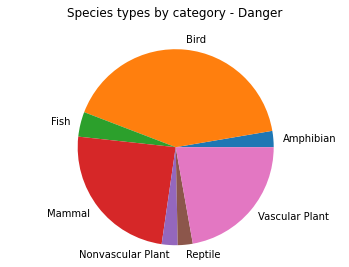

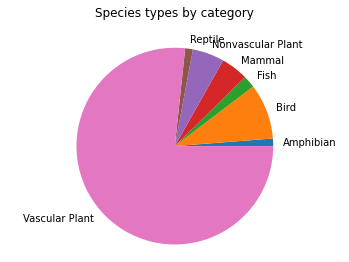

<Figure size 432x288 with 0 Axes>

In [9]:


#total observations by category in danger
category_sum_danger = in_danger.groupby("category")["observations"].sum().reset_index()
graph_labels = ["Amphibian", "Bird", "Fish", "Mammal", "Nonvascular Plant", "Reptile", "Vascular Plant"]

plt.pie(category_sum_danger["observations"], labels = graph_labels)
plt.axis("equal")
plt.title("Species types by category - Danger\n")
plt.show()
plt.clf()


#total observations by category total
category_sum = obs_and_spec.groupby("category")["observations"].sum().reset_index()

graph_labels = ["Amphibian", "Bird", "Fish", "Mammal", "Nonvascular Plant", "Reptile", "Vascular Plant"]

plt.pie(category_sum["observations"], labels = graph_labels)
plt.axis("equal")
plt.title("Species types by category\n")
plt.show()
plt.clf()




The top pie chart shows the distribution of species family types for observations categorized by either danger, threatened, recovery. The second pie chart shows the distribution of species family types for all observations. Out of all the charts, this one has the most stark difference between danger and total. In the danger chart, the majority of observed species are birds and mammals. In the total chart, the majority (¾) of species were vascular plants. The conclusion from both charts is that endangerment is affecting the mammals and birds, shrinking of those families affects the ecosystem the most. 


In [10]:
print("Species with the least observations, need most attention\n")

in_danger = in_danger.sort_values(by=['observations'])
print(in_danger["scientific_name"].head())



Species with the least observations, need most attention

2479       Rana sierrae
23160    Grus americana
4602        Canis rufus
6033        Canis lupus
6032        Canis lupus
Name: scientific_name, dtype: object


Main conclusions: 

From the pie charts - The second pie chart (species type count by endangerment level) has a larger ratio of endangered/threatened species than the first pie chart (total observation count categorised by endangerment level). There are many types of endangered/threatened species observed in all the parks, but fewer quantities observed for them.

From bar chart - The proportions of rare species to total species is the same for all national parks, meaning that there are no parks that need more attention than others
From the family pie chart - Birds and mammals comprise the most ENDANGERED observations, conservation strategies for these families need to be looked at carefully.
